In [ ]:
# plotting anomalies

In [ ]:
# # to subtract the surrouding year to the monthly values (anomaly),  
# a = np.arange(1,37,1)
# time_var = pd.date_range("1970-01-16",periods=36,freq=pd.DateOffset(months=1))
# da = xr.DataArray(
#     data=a, 
#     dims=['time'], 
#     coords={'time':time_var})
# print(da)

# rolling_mean = da.rolling(time=12, center=True).mean()
# print(rolling_mean)
# # rolling_mean_shifted = rolling_mean.shift(time=-1)
# # print(rolling_mean_shifted)
# anomalies = da - rolling_mean
# print(anomalies)

In [ ]:
# 12-month running mean anomaly
aWeights = np.cos(np.deg2rad(hur.lat))
y= hur.weighted(aWeights).mean(dim=('lat','lon'))

aWeights = np.cos(np.deg2rad(hur.lat))
y= hur.weighted(aWeights).mean(dim=('lat','lon')) 
rolling_mean = y.rolling(time=12, center=True).mean()
anomalies_annual = y - rolling_mean
anomalies_annual = anomalies_annual.dropna(dim='time')

title = '12-month running mean anomaly from {}, model:{}, experiment:{}'.format('vertical mean hur', datasets[0], experiments[0])
xlabel = '{} anomaly [{} - {}]'.format(timeMean_options[0], str(hur.isel(time=6).coords['time'].values)[:10], str(hur.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', hur.units)

plot_timeseries(anomalies_annual, title=title, timeMean_option=timeMean_options)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

In [ ]:
# monthly anomaly
a = hur.weighted(aWeights).mean(dim=('lat','lon'))
climatology = a.groupby('time.month').mean('time')
anomalies_monthly = a.groupby('time.month') - climatology 
#month_length = a.time.dt.days_in_month
#* month_length / month_length.mean()

title = 'deseasonalized anomaly from {}, model:{}, experiment:{}'.format('vertical mean hur', datasets[0], experiments[0])
xlabel = '{} anomaly [{} - {}]'.format(timeMean_options[0], str(hur.isel(time=6).coords['time'].values)[:10], str(hur.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', hur.units)

plot_timeseries(anomalies_monthly, title=title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

### detreding the humidity data (Fast Fourier Transform analysis)

In [ ]:
# In most of the monthly data there are oscillations associated with seaasons, annual variability, and decadal variability. There might also be a trend in the data.T
# To remove the strongest oscillations we can use a fourier transform on the strongest oscillations.

In [ ]:
# starting with the humidity data

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'frequencies')

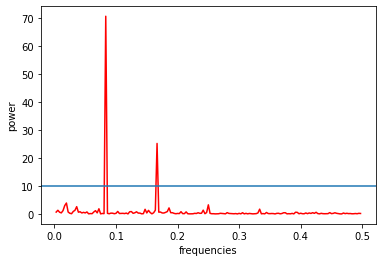

In [ ]:
f= data.weighted(aWeights).mean(dim=('lat','lon'))
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs
plt.plot(freq[L],PSD[L],color='r')
plt.axhline(10)
plt.ylabel('power')
plt.xlabel('frequencies')

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'frequencies')

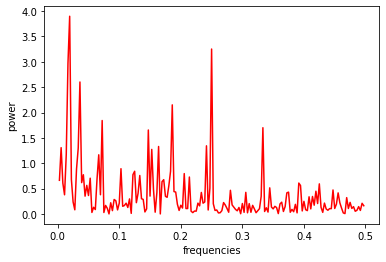

In [ ]:
subset = PSD < 10
PSD_filtered = PSD * subset
plt.plot(freq[L],PSD_filtered[L],color='r')
plt.ylabel('power')
plt.xlabel('frequencies')

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


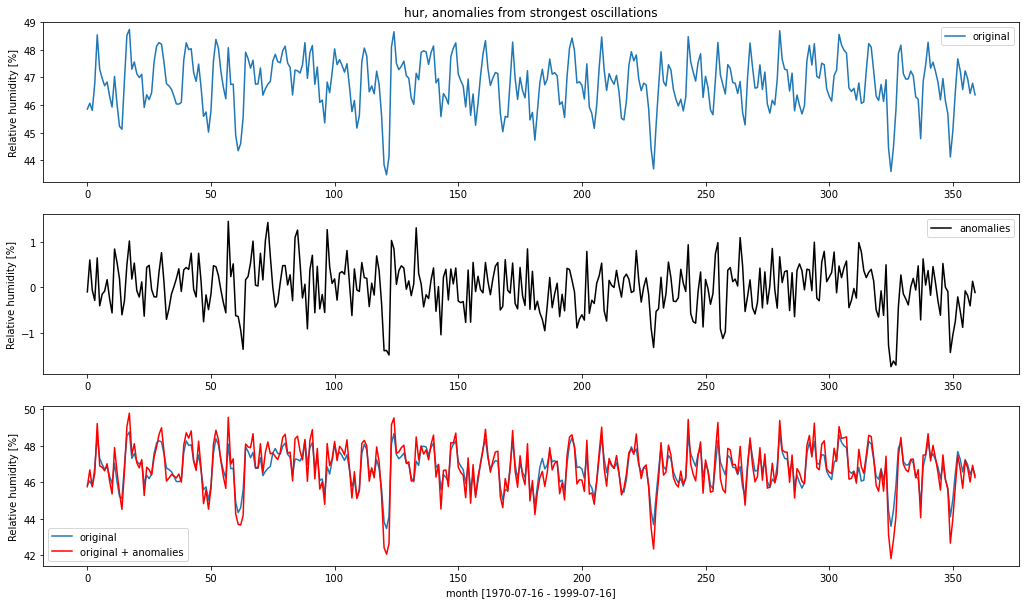

In [ ]:
f= data.weighted(aWeights).mean(dim=('lat','lon'))
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

subset = PSD < 2
fhat_filtered = fhat * subset
data_filtered = np.fft.ifft(fhat_filtered) # Inverse FFT for retrieving datapoints with strongest frequencies removed

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', '%')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.title('hur, anomalies from strongest oscillations')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[1])
plt.plot(data_filtered, 'k', label='anomalies')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+data_filtered,color='r', label='original + anomalies')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# Doing the same thing for rome

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0, 'frequencies')

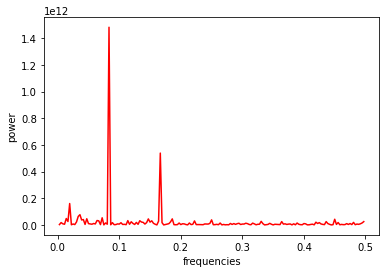

In [ ]:
f= org.resample(time='M').mean(dim='time', keep_attrs=True)
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

plt.plot(freq[L],PSD[L],color='r')
plt.ylabel('power')
plt.xlabel('frequencies')

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


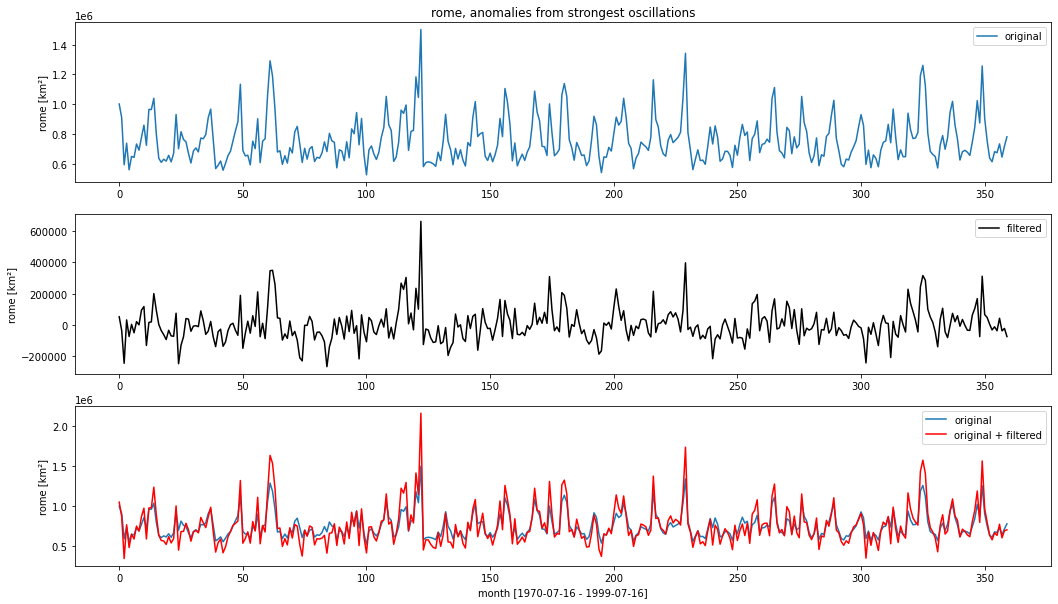

In [ ]:
f= org.resample(time='M').mean(dim='time', keep_attrs=True)
n = len(f)
fhat = np.fft.fft(f,n) # FFT coefficients
PSD = fhat * np.conj(fhat) / n # Power Spectral Density
freq = np.fft.fftfreq(n, d=1) # frequencies, bin centers as cycles per sample spacing, dx= 1, freq = (1/(dx*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

subset = PSD < 0.2e12
fhat_filtered = fhat * subset
org_filtered = np.fft.ifft(fhat_filtered) # Inverse FFT for retrieving datapoints with strongest frequencies removed

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', 'km\u00b2')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.title('rome, anomalies from strongest oscillations')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[1])
plt.plot(org_filtered, 'k', label='filtered')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+org_filtered,color='r', label='original + filtered')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# plot the correlation of the anomalies

In [ ]:
def plot_scatter(x,y,ax):
    ax.scatter(x,y,facecolors='none', edgecolor='k')
    res= stats.pearsonr(x,y)
    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.8, 0.875), textcoords='axes fraction') # xy=(0.2, 0.1), xytext=(0.05, 0.875)


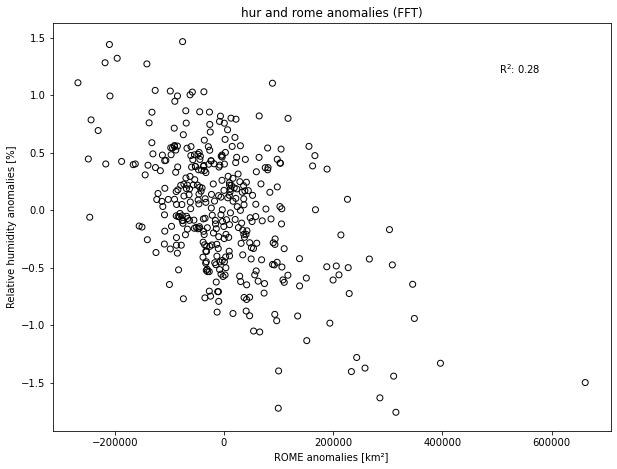

In [ ]:
fig = plt.figure()
ax= fig.add_subplot()

plot_scatter(org_filtered.real, data_filtered.real, ax)
plt.title('hur and rome anomalies (FFT)')
plt.xlabel('ROME anomalies [{}]'.format('km\u00b2'))
plt.ylabel('Relative humidity anomalies [{}]'.format('%'))
plt.show()

### Anomaly from monthly mean

In [ ]:
# relative humidity

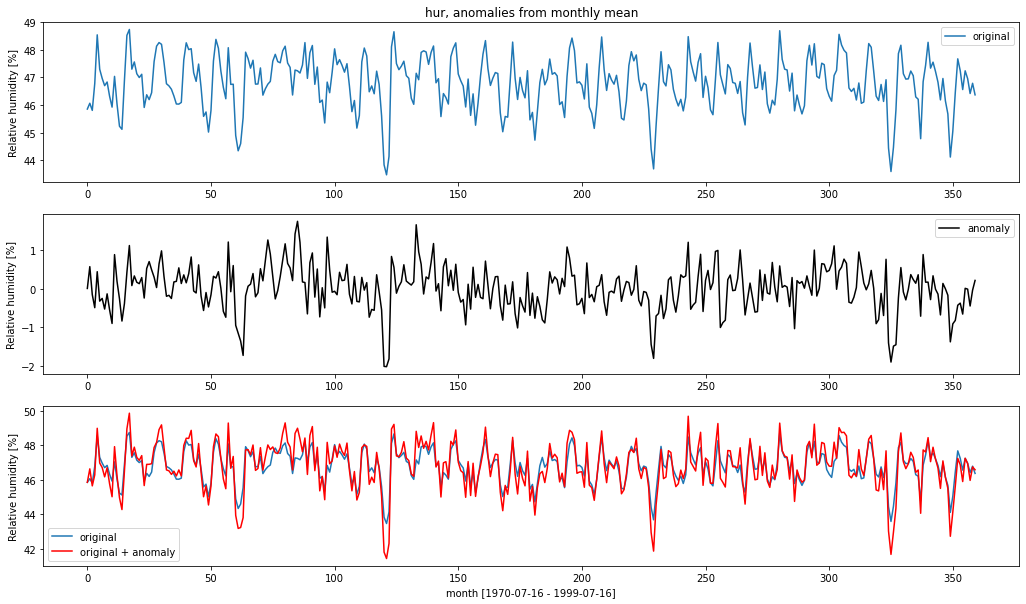

In [ ]:
f = data.weighted(aWeights).mean(dim=('lat','lon'))
climatology = f.groupby('time.month').mean('time')
data_anomalies_month = f.groupby('time.month') - climatology 

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', '%')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('hur, anomalies from monthly mean')
plt.legend()

plt.sca(axs[1])
plt.plot(data_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+data_anomalies_month,color='r', label='original + anomaly')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

In [ ]:
# rome

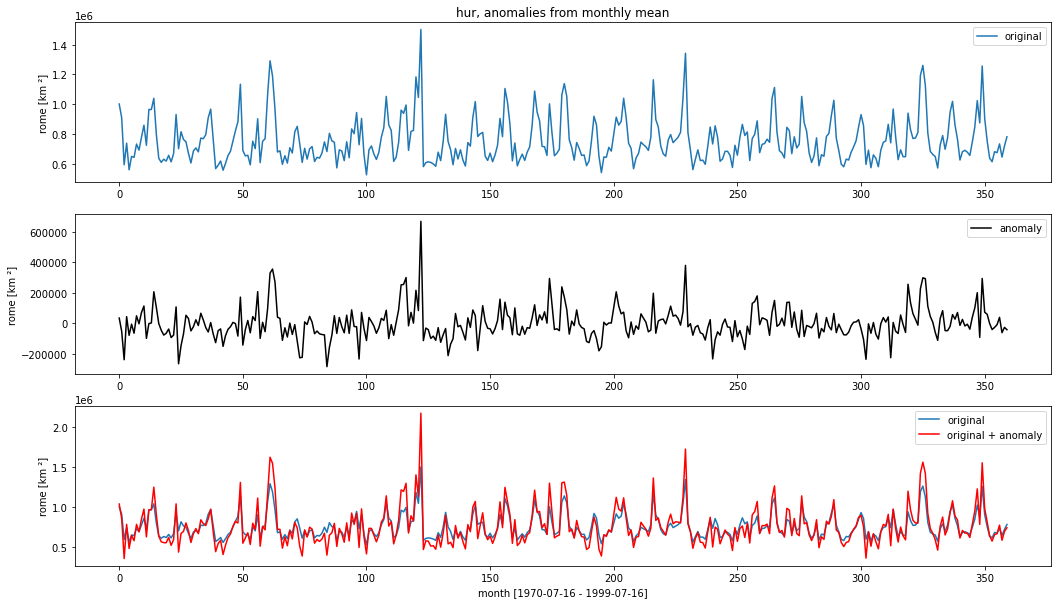

In [ ]:
f = org.resample(time='M').mean(dim='time', keep_attrs=True)
climatology = f.groupby('time.month').mean('time')
org_anomalies_month = f.groupby('time.month') - climatology 

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-6).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', 'km \u00b2')

plt.sca(axs[0])
plt.plot(f, label='original')
plt.ylabel(ylabel)
plt.title('DOC, anomalies from monthly mean')
plt.legend()

plt.sca(axs[1])
plt.plot(org_anomalies_month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(f, label='original')
plt.plot(f+org_anomalies_month,color='r', label='original + anomaly')
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

### Anomaly from 12 month rolling mean

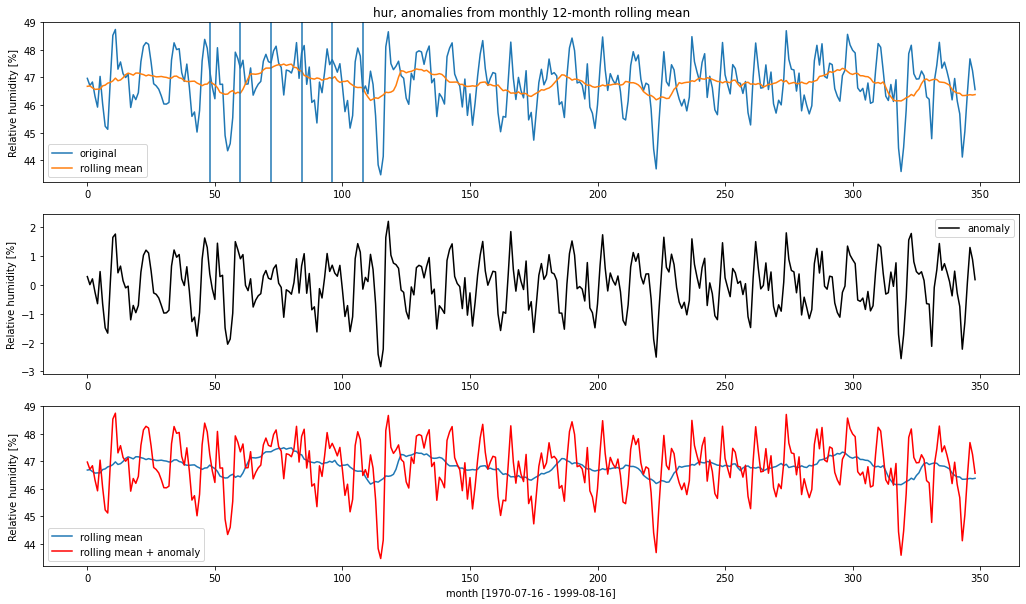

In [ ]:
f= data.weighted(aWeights).mean(dim=('lat','lon')) 
rolling_mean = f.rolling(time=12, center=True).mean()
data_anomalies_12month = f - rolling_mean

data_anomalies_12month = data_anomalies_12month.dropna(dim='time')
rolling_mean = rolling_mean.dropna(dim='time')

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-5).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('Relative humidity', '%')

plt.sca(axs[0])
plt.plot(f[6:-5], label='original')
plt.plot(rolling_mean, label='rolling mean')
plt.ylabel(ylabel)
plt.title('hur, anomalies from monthly 12-month rolling mean')

for i in np.arange(4,10):
    plt.axvline(12*i)

plt.legend()

plt.sca(axs[1])
plt.plot(data_anomalies_12month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_mean+data_anomalies_12month,color='r', label='rolling mean + anomaly')


plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()

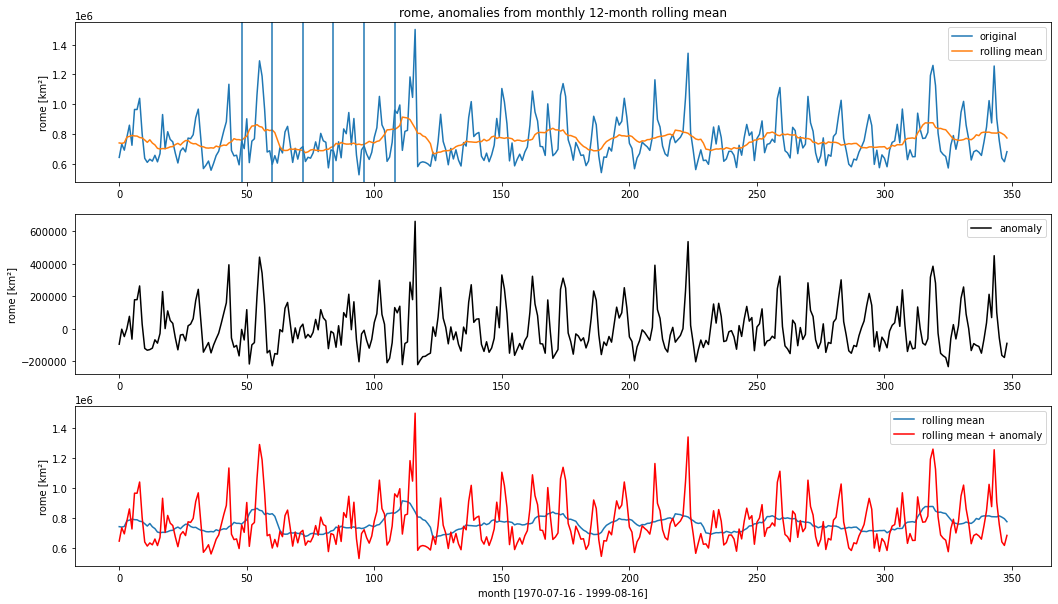

In [ ]:
f = org.resample(time='M').mean(dim='time', keep_attrs=True)
rolling_mean = f.rolling(time=12, center=True).mean()
org_anomalies_12month = f - rolling_mean

org_anomalies_12month = org_anomalies_12month.dropna(dim='time')
rolling_mean = rolling_mean.dropna(dim='time')

fig, axs = plt.subplots(3,1,figsize=(17.5,10))

xlabel = '{} [{} - {}]'.format(timeMean_options[0][:-2], str(data.isel(time=6).coords['time'].values)[:10], str(data.isel(time=-5).coords['time'].values)[:10])
ylabel = '{} [{}]'.format('rome', 'km\u00b2')

plt.sca(axs[0])
plt.plot(f[6:-5], label='original')
plt.plot(rolling_mean, label='rolling mean')
plt.ylabel(ylabel)
plt.title('rome, anomalies from monthly 12-month rolling mean')

for i in np.arange(4,10):
    plt.axvline(12*i)

plt.legend()

plt.sca(axs[1])
plt.plot(org_anomalies_12month, 'k', label='anomaly')
plt.ylabel(ylabel)
plt.legend()

plt.sca(axs[2])
plt.plot(rolling_mean, label='rolling mean')
plt.plot(rolling_mean+org_anomalies_12month,color='r', label='rolling mean + anomaly')

    
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.legend()